# Analyse en composantes principales

Ce notebook reprend une partie des exemples du chapitre du Python Data Science Handbook sur l'analyse en composantes principales écrit par Jake VanderPlas et disponible ici : https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Je ne saurais que trop vous conseiller cet article de l'éminent Antoine Sireyjol : https://blog.statoscop.fr/acp-python.html

## Explication introductive

L'analyse en composantes principales est une méthode consistant à transformer des variables corrélées entre elles en nouvelles variables. Chacune de ces nouvelles variables est le résultat d'une combinaison linéaire des anciennes variables. Ces nouvelles variables sont appelées composantes principales et sont décorrélées les unes des autres. Leur nombre est inférieur ou égal au nombre de variables à l'origine. Cette méthode est donc utilisée en particulier pour réduire le nombre de dimensions (= de variables) d'une problématique donnée. 

On commence par importer les modules nécessaires : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler

## Premier exemple en deux dimensions

On reprend les variables créées par Jake VanderPlas pour son exemple en 2 dimensions : 

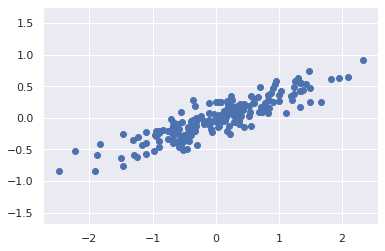

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Les variables X et Y sont clairement liées par une relation linéaire, mais ça n'est pas ce qui nous intéresse forcément en ACP. On va chercher à représenter comment les points sont distribués en fonction des valeurs de x et y.

Commençons par construire les 2 premières composantes des valeurs de X :

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

L'objet pca une fois adapté ("fité") aux données contient deux objets qui nous intéressent particulièrement :  
- les composantes  
- la variance expliquée

On peut retrouver ces éléments ainsi : 

In [4]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

On interprète ces composantes ainsi :
$$PC_1 = -0.94 \times x_1 - 0.32 \times x_2$$
$$PC_2 = -0.32 \times x_1 + 0.94 \times x_2$$

Pour la variance, on peut sortir la variance expliquée par les composantes principales et la part de la variance totale expliquée par ces composantes : 

In [5]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [6]:
sum(pca.explained_variance_)

0.7810093963961741

In [7]:
print(f"{np.var(X[:, 0])} + {np.var(X[:, 1])} = {np.var(X[:, 0]) + np.var(X[:, 1])}")

0.678766717934191 + 0.09833763148000234 = 0.7771043494141933


In [8]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

Ce ratio représente la contribution de chaque composante à l'explication de la variance globale. On remarque ici qu'une seule composante principale permet d'expliquer 97% de la variance globale. Comme on a utilisé autant de composantes principales que de variables disponibles, le ratio somme à 1.  

Les composantes principales peuvent être représentées comme des nouveaux axes, que Jake VanderPlas représnete ainsi dans son article, la longueur des vecteurs étant associée à l'importance de la variance expliquée par chacune des composantes :  

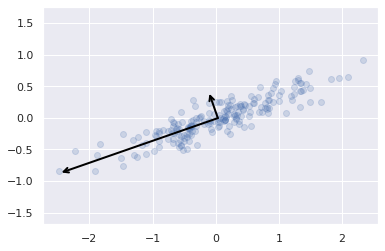

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color = "black",
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Le premier axe est défini en fonction de la direction de la plus grande variance, le second axe (qui doit être orthogonal au premier) en fonction de la direction de la seconde plus grande variance (et caetera quand il y a plus de dimensions).  
On peut également représenter graphiquement les points dans un nouveaux système de coordonnées où les axes sont les composantes principales. Comme les composantes principales sont définies de manière à ne pas être corrélées entre elles, la représentation graphique ne laisse pas apparaître de liens de corrélation entre celles-ci : 

Text(0.5, 1.0, 'Composantes principales')

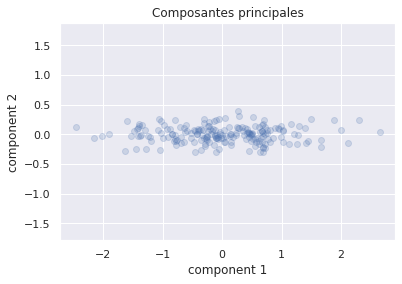

In [10]:
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Composantes principales')

On profite d'avoir créé `X_pca` pour vérifier que les axes sont bien décorrélés : 

In [11]:
np.corrcoef(X_pca[:, 0], X_pca[:, 1])

array([[1.00000000e+00, 4.66285352e-16],
       [4.66285352e-16, 1.00000000e+00]])

In [12]:
X_pca[0]

array([0.67676923, 0.0597386 ])

## Réduction du nombre de dimensions

L'ACP est surtout intéressante pour réduire le nombre de dimensions lors d'une analyse tout en conservant le plus de variance expliquée de nos observations. On peut le faire par exemple dans notre cas en ne retenant qu'une seule composante principale : 

In [13]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Ce qui donne en représentation graphique : 

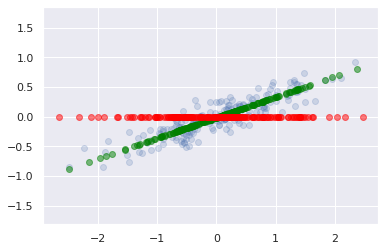

In [14]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5, color = "green")
plt.scatter(-X_pca[:, 0], np.zeros(len(X_pca)), alpha=0.5, color = "red")
plt.axis('equal');

## Exercice 1 : les chiffres manuscrits

On va faire un petit exercice d'application sur les donnés de chiffres manuscrits qu'on commence à bien connaître :
1. Récupérer comme d'habitude les données `digits` de sklearn
2. Faites une analyse en composantes principales avec 2 composantes principales  
3. Donnez la part de variance expliquée par ces deux composantes  
4. Représentez les données en fonction de ces composantes principales. Cette analyse permet-elle de séparer correctement les différentes classes?

In [15]:
from sklearn.datasets import load_digits
X,y= load_digits(return_X_y=True)

In [16]:
# on paramètre l'ACP et on récupère les parts de variance expliquée
pca = PCA(2).fit(X)
X_pca = pca.transform(X)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

[0.14890594 0.13618771] 0.2850936482369618


Un peu moins de 30% de la variance des données qui est expliquée par les 2 premières composantes principales.

In [17]:
# quelles sont les composantes?
pca.components_

array([[-1.48384304e-17, -1.73094666e-02, -2.23428842e-01,
        -1.35913303e-01, -3.30323103e-02, -9.66340859e-02,
        -8.32943703e-03,  2.26900125e-03, -3.20516522e-04,
        -1.19308910e-01, -2.44451676e-01,  1.48512747e-01,
        -4.67319523e-02, -2.17740746e-01, -1.48136754e-02,
         4.47779542e-03, -4.94136454e-05, -7.95419426e-02,
         8.33951499e-02,  2.15915344e-01, -1.72126801e-01,
        -1.63712100e-01,  2.86444444e-02,  4.23251797e-03,
         9.85488590e-05,  6.42319124e-02,  2.54093310e-01,
        -3.56771024e-02, -2.09462559e-01, -4.31311495e-02,
         5.13118630e-02,  2.13422730e-04,  0.00000000e+00,
         1.59950883e-01,  3.68690763e-01,  1.64406818e-01,
         8.52007930e-02,  3.72982862e-02,  2.15866972e-02,
         0.00000000e+00,  1.28865588e-03,  1.06945290e-01,
         3.03067463e-01,  2.47813038e-01,  2.09637294e-01,
         1.22325223e-02, -3.69458490e-02,  1.61485027e-03,
         6.93023572e-04, -8.35144092e-03, -5.58598939e-0

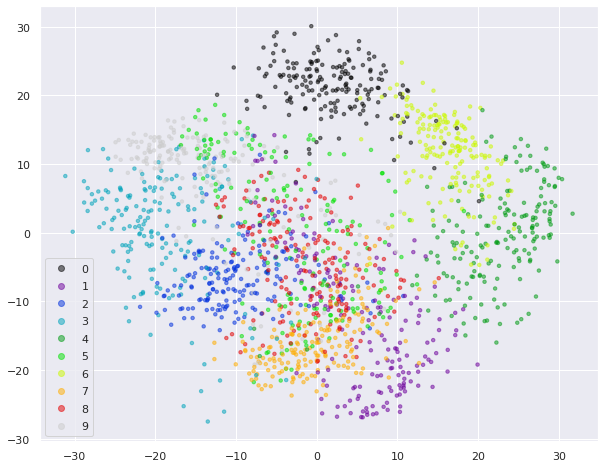

In [18]:
# allons voir graphiquement ce qui se passe
plt.figure(figsize=(10,8))
scat = plt.scatter(X_pca[:,0], X_pca[:,1],
                   c=y, cmap=plt.cm.get_cmap('nipy_spectral'),
                   alpha=0.5, s=12)
plt.legend(*scat.legend_elements());

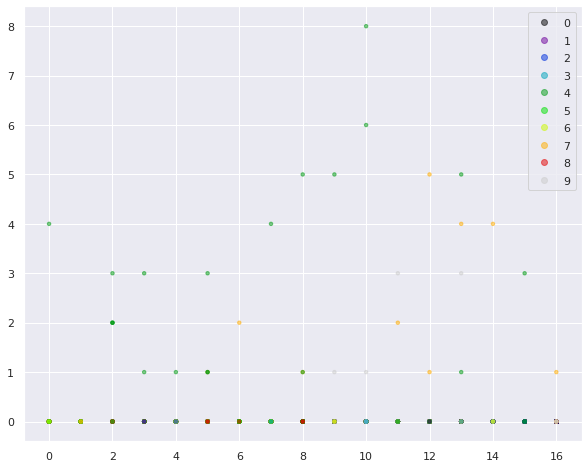

In [19]:
# que se passe t-il si on prend 2 pixels quelconque ?
plt.figure(figsize=(10,8))
scat = plt.scatter(X[:,12], X[:,23],
                   c=y, cmap=plt.cm.get_cmap('nipy_spectral'),
                   alpha=0.5, s=12)
plt.legend(*scat.legend_elements());

## Choisir le nombre de composantes 

Si choisir deux composantes principales est toujours intéressant pour pouvoir représenter graphiquement ses résultats, il est important de tenir compte de la variance expliquée par chaque composante afin de déterminer quel nombre retenir.  

On peut pour cela représenter l'évolution du ratio de la variance expliquée en fonction du nombre de composantes retenues :  

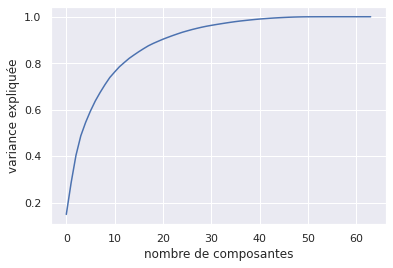

In [20]:
pca = PCA(64).fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composantes')
plt.ylabel('variance expliquée');

On peut avec la fonction `PCA` définir le nombre de composantes voulues mais aussi la variance minimum à atteindre : 

In [21]:
pca = PCA(0.75).fit(X)
pca.n_components_

11

In [22]:
pca = PCA(11).fit(X)
pca.explained_variance_ratio_.sum()

0.7619472908973232

In [23]:
pca = PCA(0.95).fit(X)
pca.n_components_

29

In [24]:
pca = PCA(29).fit(X)
pca.explained_variance_ratio_.sum()

0.9547949807933045

## Exercice 2 : ACP sur iris
- Importez la base de données iris disponible dans sklearn.datasets
- Avant de mener notre ACP, il faudrait transformer d'abord nos données. Voyez-vous de quelle manière?
- Faites une ACP avec deux composantes et représentez les points en fonction de ces composantes.  
- Les différentes espèces de fleurs sont-elles bien partitionnées dans ce plan?  

['setosa' 'versicolor' 'virginica']
Part de variance expliquée par 2 composantes :  0.9581320720000165


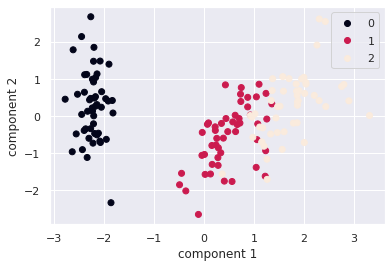

In [25]:
# Import données
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
print(load_iris().target_names)

# standardisation
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# PCA
pca=PCA(2)
pca_iris = pca.fit_transform(X)
print("Part de variance expliquée par 2 composantes : ", pca.explained_variance_ratio_.sum())

# plot
scat = plt.scatter(pca_iris[:, 0], pca_iris[:, 1], c=y)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend(*scat.legend_elements());

## Exercice 3 : classification des vins  
- Importez la base de données wine disponible dans sklearn.datasets   
- Faites le graphique de l'évolution du ratio de la variance expliquée en fonction du nombre de composantes principales. Y-a-t-il matière à réduire le nombre de dimensions? Quel nombre de composantes principales choisiriez-vous?  
- Faites une ACP et représentez les points en fonction de ces composantes.  
- Les différentes classes sont-elles bien partitionnées dans ce plan?  

In [36]:
print(load_wine().DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [26]:
# Import données
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

# standardisation
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

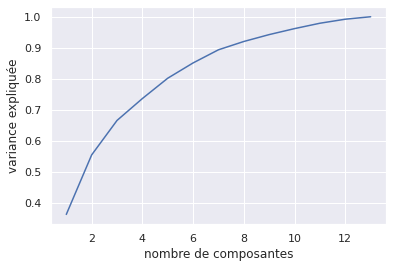

In [32]:
pca = PCA(X.shape[1]).fit(X)
plt.plot(range(1,14), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composantes')
plt.ylabel('variance expliquée');

In [28]:
# On paramètre notre PCA pour qu'il y ait 90% de la variance expliquée
pca = PCA(0.90)
pca_wine = pca.fit_transform(X)
print(f"{pca.n_components_} composantes (sur {X.shape[1]}) expliquent {round(pca.explained_variance_ratio_.sum(),3)}% de la variance")

8 composantes (sur 13) expliquent 0.92% de la variance


2 composantes expliquent 0.554% de la variance


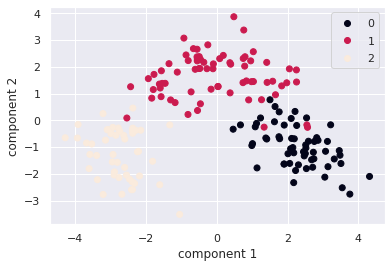

In [30]:
# plot sur les 2 premières composantes
print(f"2 composantes expliquent {round(pca.explained_variance_ratio_[:2].sum(),3)}% de la variance")
scat = plt.scatter(pca_wine[:, 0], pca_wine[:, 1], c=y)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend(*scat.legend_elements());

## Exercice 4 : modèle de prédiction sur MNIST  
- Sur les données MNIST, choisissez le nombre de composantes principales permettant de garder 75% de la variance totale.  
- Faites tourner un modèle de prédiction de régression logistique comme on l'a déjà fait.  
- Comparez les résultats en termes de précision.  
- Comparez les résultats en termes de temps d'exécution

In [21]:
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
%%time
pca = PCA(0.75)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"pour {pca.n_components_} composantes, on explique {pca.explained_variance_ratio_.sum()} de la variance")

pour 120 composantes, on explique 0.7501532399167186 de la variance
CPU times: user 1min 13s, sys: 34.7 s, total: 1min 47s
Wall time: 18 s


In [13]:
%%time

# instanciation du modèle
reglog = LogisticRegression(solver='lbfgs', max_iter = 1000)

# entrainement du modèle 
reglog.fit(X_train, y_train)

# prédictions
y_pred = reglog.predict(X_test)

print(f"La précision du modèle est {reglog.score(X_test, y_test)}")

CPU times: user 27min 29s, sys: 12min 15s, total: 39min 45s
Wall time: 6min 19s


In [17]:
%%time
pca = PCA(0.75)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# instanciation du modèle
reglog2 = LogisticRegression(solver='lbfgs', max_iter = 1000)

# entrainement du modèle 
reglog2.fit(X_train_pca, y_train)

# prédictions
y_pred = reglog2.predict(X_test_pca)

print(f"La précision du modèle est {reglog2.score(X_test_pca, y_test)} en gardant {pca.n_components_} composantes")

La précision du modèle est 0.9228 en gardant 120 composantes
CPU times: user 8min 6s, sys: 4min 43s, total: 12min 49s
Wall time: 1min 55s


In [18]:
%%time
pca = PCA(0.60)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# instanciation du modèle
reglog2 = LogisticRegression(solver='lbfgs', max_iter = 1000)

# entrainement du modèle 
reglog2.fit(X_train_pca, y_train)

# prédictions
y_pred = reglog2.predict(X_test_pca)

print(f"La précision du modèle est {reglog2.score(X_test_pca, y_test)} en gardant {pca.n_components_} composantes")

La précision du modèle est 0.9106 en gardant 64 composantes
CPU times: user 3min 55s, sys: 2min 24s, total: 6min 19s
Wall time: 56.7 s


In [19]:
%%time
pca = PCA(0.90)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# instanciation du modèle
reglog2 = LogisticRegression(solver='lbfgs', max_iter = 1000)

# entrainement du modèle 
reglog2.fit(X_train_pca, y_train)

# prédictions
y_pred = reglog2.predict(X_test_pca)

print(f"La précision du modèle est {reglog2.score(X_test_pca, y_test)} en gardant {pca.n_components_} composantes")

La précision du modèle est 0.9288 en gardant 236 composantes
CPU times: user 12min 34s, sys: 7min 19s, total: 19min 54s
Wall time: 3min 14s


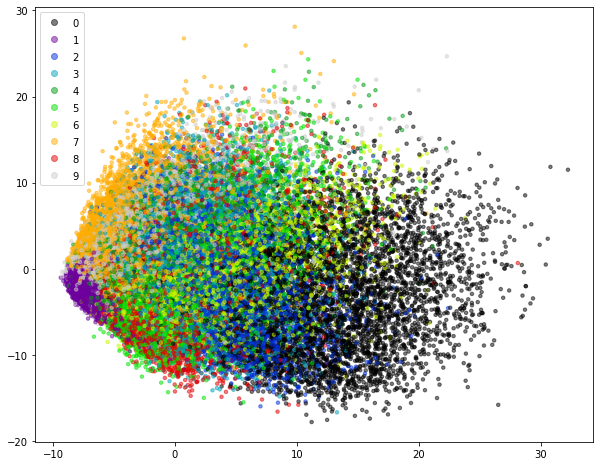

In [22]:
# représentation graphique
pca = PCA(2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

plt.figure(figsize=(10,8))
scat = plt.scatter(X_pca[:,0], X_pca[:,1],
                   c=y_train, cmap=plt.cm.get_cmap('nipy_spectral'),
                   alpha=0.5, s=12)
plt.legend(*scat.legend_elements());